# Twitter-Sentiment-Analysis

### Problem Statement 
classify the tweets by implementing any NLP approach for Sentiment analysis on the provided dataset. The objective is to recognize whether the given tweet is oriented as negative (-1), neutral (0), or positive (1) tone. Focus majorly on unique preprocessing techniques.

### Context:-
Sentiment analysis studies the subjective information in an expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or entity.The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1).

### Data overview:-
The dataset contains information about

1. Tweet - Message Tweeted

2. label - Sentiment for the tweet

### Content:-
1 Importing Packages 

2 Importing Data

3 Analysing Data

4 Lebel Encoding


5 Data Visualization

Distribution of different sentiments
Word cloud on different sentiments

6 Data Preprocessing

7 Text Processing

8 Steeming

9 Lemmatization

10 Feature Extraction

11 Count Vectorization

12 Training Models

13 Logistic Regression




### Importing Packages

In [1]:
# Importing Packages
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import urllib.request
import re
import nltk
#nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from gensim.models import Word2Vec
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE

### importing data

In [2]:
df = pd.read_csv('twitter_tweets.csv')

In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


### Perform Sentimental Analysis on Twitter tweets and create a model which will be able to identify the sentiments of the tweets. 



### Analysing Data

In [4]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [5]:
df.columns = ['Code', 'Area', 'Sentiment','tweet']

In [6]:
df.sample(5)

,Code,Area,Sentiment,tweet
33750,6597,Fortnite,Irrelevant,Check out this fantastic new app called TraX! ...
26311,918,AssassinsCreed,Positive,Wow! Always nice to wake up to some good news ...
43952,10347,PlayerUnknownsBattlegrounds(PUBG),Negative,PUBG is banned in this county
58563,3240,Facebook,Irrelevant,B Witnessing 60 year olds make Facebook status...
37513,5232,Hearthstone,Negative,Does anyone have a problem keeping the Hearths...


In [7]:
df = df[['Sentiment', 'tweet']]

In [8]:
df.dtypes

Sentiment    object
tweet        object
dtype: object

In [9]:
df

,Sentiment,tweet
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


### Label encoding

In [10]:
df['Sentiment'].replace({'Negative':-1,'Positive':1,'Neutral':0,'Irrelevant':2},inplace=True)

In [11]:
df

,Sentiment,tweet
0,1,I am coming to the borders and I will kill you...
1,1,im getting on borderlands and i will kill you ...
2,1,im coming on borderlands and i will murder you...
3,1,im getting on borderlands 2 and i will murder ...
4,1,im getting into borderlands and i can murder y...
...,...,...
74676,1,Just realized that the Windows partition of my...
74677,1,Just realized that my Mac window partition is ...
74678,1,Just realized the windows partition of my Mac ...
74679,1,Just realized between the windows partition of...


In [12]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"Sentiment")

,Total,Percentage
-1,22542,30.18
1,20831,27.89
0,18318,24.53
2,12990,17.39


# insights:-
1:-In this data, we have more than 25% positive tweets

2:- We have more then 27% negative tweets.

3:- Combination of Neutral and Irrelevant tweets is more then 40%

In [13]:
# Segrating based on different sentiments
df_negative = df[df["Sentiment"]==-1]
df_positive = df[df["Sentiment"]==1]
df_neutral = df[df["Sentiment"]==0]
df_Irrelevant = df[df["Sentiment"]==2]


### Data Visualization

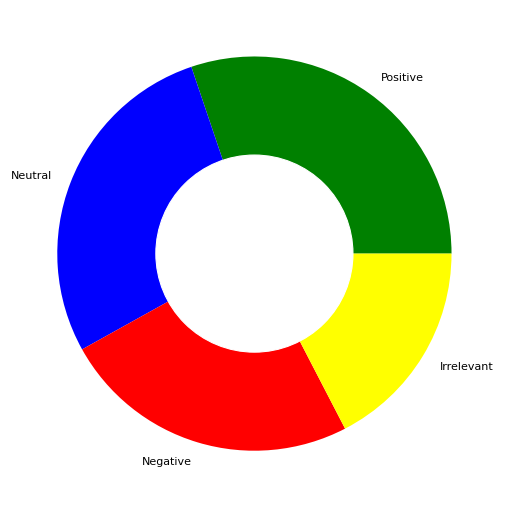

In [14]:
# create data for Pie Chart
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(df,"Sentiment")
names= ["Positive","Neutral","Negative","Irrelevant"]
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red',"yellow"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [15]:
# Function to Create Wordcloud
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))

### Parameter of wordcloud function:-
background_color = Color of background

max_words = The maximum number of unique words used

stopwords = stopword list

max_font_size = Maximum font size

random_state = To ensure that random numbers are generated in the

same order, so the results will be the same even if generated several times

width = width size of the output

height = height size of the output

Word Cloud Saved Successfully


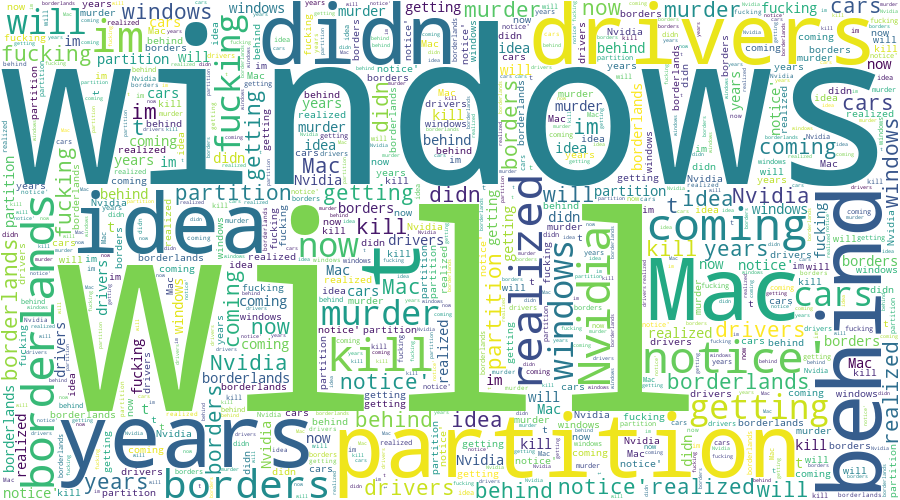

<Figure size 1200x640 with 0 Axes>

In [16]:
# Wordcloud for all tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df['tweet'].values,"all.png")

Word Cloud Saved Successfully


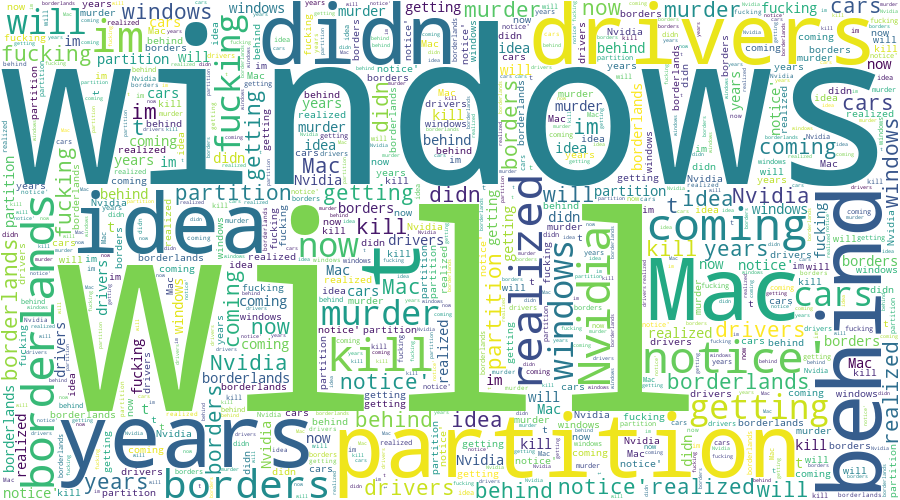

<Figure size 1200x640 with 0 Axes>

In [17]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_positive['tweet'].values,"positive.png")

Word Cloud Saved Successfully


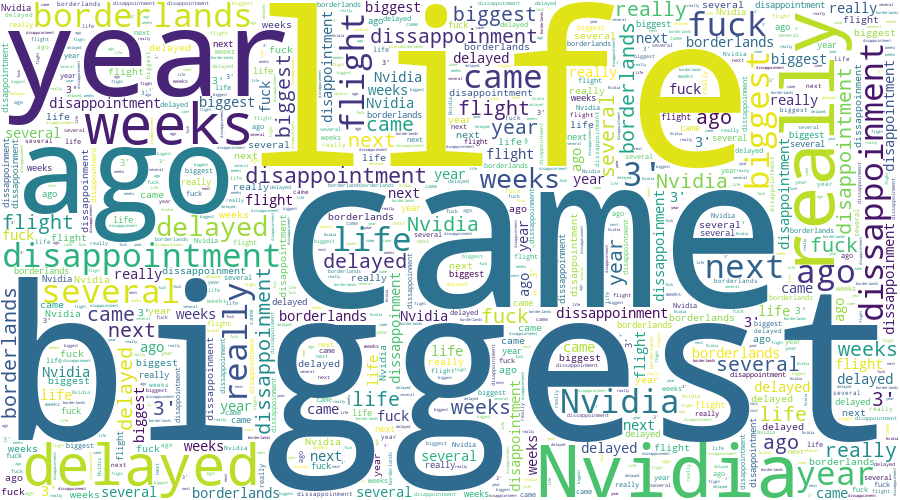

<Figure size 1200x640 with 0 Axes>

In [18]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_negative['tweet'].values,"positive.png")

Word Cloud Saved Successfully


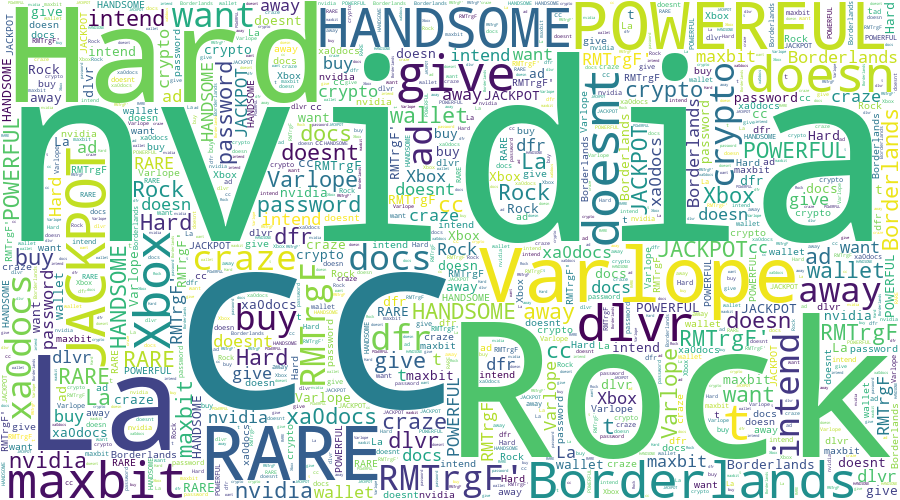

<Figure size 1200x640 with 0 Axes>

In [19]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_neutral['tweet'].values,"positive.png")

Word Cloud Saved Successfully


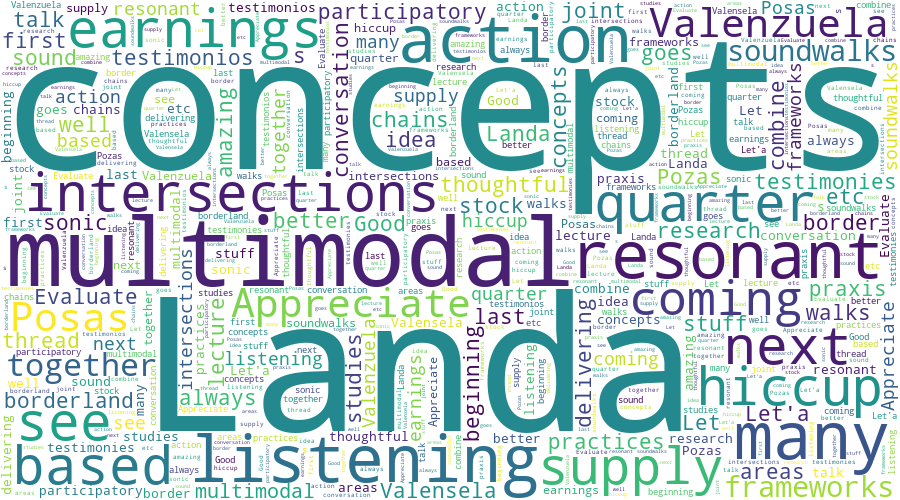

<Figure size 1200x640 with 0 Axes>

In [20]:
# Wordcloud for only positive tweets
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(df_Irrelevant['tweet'].values,"positive.png")

### Insights:-
1:- From all these wordclouds of different classes, we can "WILL" is the common words used

2:- From positive sentiment wordclouds, we can see that "WINDOWS","IDEA" are the most common words used

3:- From negative sentiment wordclouds, we can see that "LIFE","CAME","BIGGEST" are the most common words used

4:- From neutral sentiment wordclouds, we can see that "ROCK","CC","NVIDIA" are the most common words used

5:-From Irrelevant sentiment wordclouds, we can see that "ROCK","CC","NVIDIA" are the most common words used

In [21]:
stopwords

<WordListCorpusReader in 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

### Data Preprocessing:-
1 Removing Punctuation

2 Drop Duplicates

3 Check String length

4 Check Distribution

5 Finding wordlength

### Removing Punctuation

In [22]:
import re
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords")
stopwords = stopwords.words("english")

In [23]:
df['tweet'] = df['tweet'].astype(str).apply(lambda x : " ".join(i for i in x.split() if i not in stopwords))

## Drop Duplicates

In [24]:
df_dup=df[df.duplicated()]
df_dup

,Sentiment,tweet
19,1,first borderlands session long time actually r...
25,-1,The biggest disappointment life came year ago.
42,0,Check epic streamer!.
44,0,Check epic streamer!.
50,0,Blaming Sight Tardiness! A little bit borderla...
...,...,...
74612,-1,Nvidia cancel order suspected bot.
74614,-1,Nvidia cancel order suspected bot.
74618,1,This news Nvidia 3000 series ligiet excited I’...
74620,1,


In [25]:
df.drop_duplicates(inplace=True)

<Axes: >

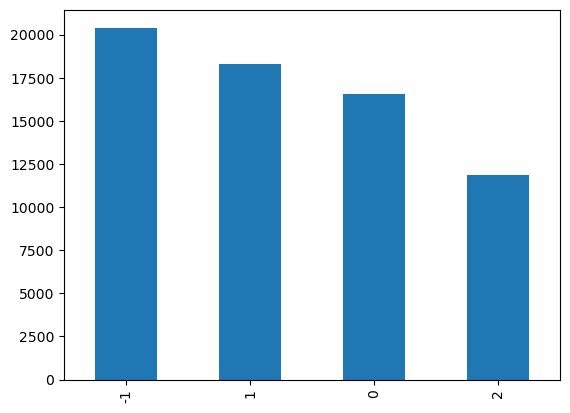

In [26]:
df['Sentiment'].value_counts().plot(kind='bar')

# Checking String length

In [27]:
df['Tweet_Length'] = df['tweet'].str.len()

In [28]:
df

,Sentiment,tweet,Tweet_Length
0,1,"I coming borders I kill all,",28
1,1,"im getting borderlands kill all,",32
2,1,"im coming borderlands murder all,",33
3,1,"im getting borderlands 2 murder all,",36
4,1,"im getting borderlands murder all,",34
...,...,...,...
74676,1,Just realized Windows partition Mac like 6 yea...,86
74677,1,Just realized Mac window partition 6 years beh...,80
74678,1,Just realized windows partition Mac 6 years be...,86
74679,1,Just realized windows partition Mac like 6 yea...,106


<Axes: ylabel='Frequency'>

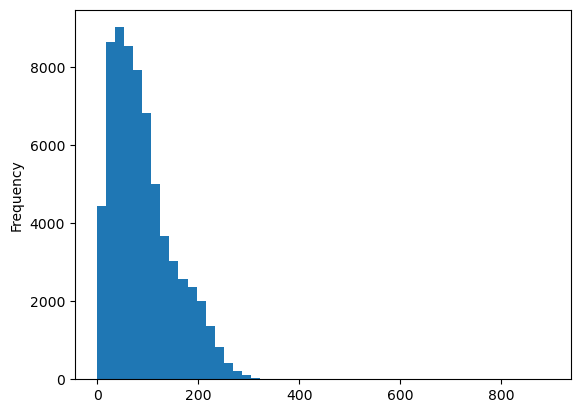

In [29]:
df['Tweet_Length'].plot(bins=50,kind='hist')

## Checking Distribution

array([[<Axes: title={'center': '-1'}>, <Axes: title={'center': '0'}>],
       [<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>]],
      dtype=object)

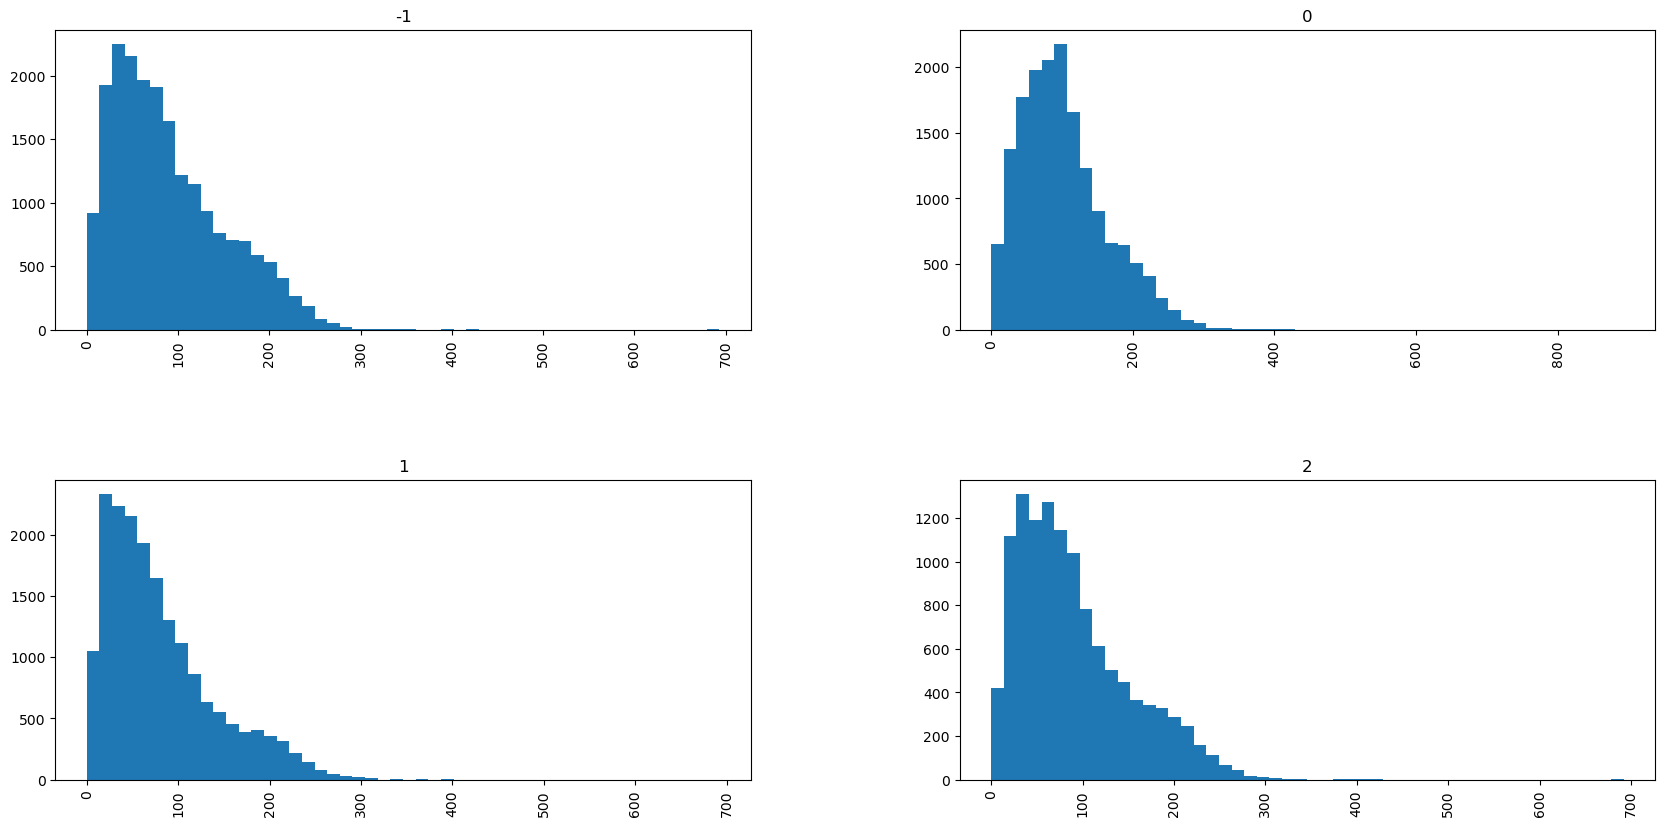

In [30]:
df.hist(column='Tweet_Length',by='Sentiment',bins=50,figsize=(20,10))

# finding word length

In [31]:
df['word_length']=df['tweet'].apply(lambda x:len(x.split(" ")))

In [32]:
df

,Sentiment,tweet,Tweet_Length,word_length
0,1,"I coming borders I kill all,",28,6
1,1,"im getting borderlands kill all,",32,5
2,1,"im coming borderlands murder all,",33,5
3,1,"im getting borderlands 2 murder all,",36,6
4,1,"im getting borderlands murder all,",34,5
...,...,...,...,...
74676,1,Just realized Windows partition Mac like 6 yea...,86,15
74677,1,Just realized Mac window partition 6 years beh...,80,14
74678,1,Just realized windows partition Mac 6 years be...,86,14
74679,1,Just realized windows partition Mac like 6 yea...,106,19


# Text Processing:-
1 Normilization(converting all words to lower case)

2 Remove Un nessarry things(Punctuation and Special Charcter)

3 Remove least repeated word

4 Remove most used words

In [33]:
# 1. Normilization(Converting all words to lower case)

df['tweet']=df['tweet'].str.lower()

In [34]:
df

,Sentiment,tweet,Tweet_Length,word_length
0,1,"i coming borders i kill all,",28,6
1,1,"im getting borderlands kill all,",32,5
2,1,"im coming borderlands murder all,",33,5
3,1,"im getting borderlands 2 murder all,",36,6
4,1,"im getting borderlands murder all,",34,5
...,...,...,...,...
74676,1,just realized windows partition mac like 6 yea...,86,15
74677,1,just realized mac window partition 6 years beh...,80,14
74678,1,just realized windows partition mac 6 years be...,86,14
74679,1,just realized windows partition mac like 6 yea...,106,19


In [35]:
# 2. Remove Un nessarry things(Punctuation and Special Charcter)
import re
df['tweet']=df['tweet'].apply(lambda x: re.sub('[^A-Za-z0-9\s]','',x))

In [36]:
df

,Sentiment,tweet,Tweet_Length,word_length
0,1,i coming borders i kill all,28,6
1,1,im getting borderlands kill all,32,5
2,1,im coming borderlands murder all,33,5
3,1,im getting borderlands 2 murder all,36,6
4,1,im getting borderlands murder all,34,5
...,...,...,...,...
74676,1,just realized windows partition mac like 6 yea...,86,15
74677,1,just realized mac window partition 6 years beh...,80,14
74678,1,just realized windows partition mac 6 years be...,86,14
74679,1,just realized windows partition mac like 6 yea...,106,19


## REMOVE LEAST REPEATED WORD

In [37]:
all_tweet = ' '.join(df['tweet']) #Concatenate all messages into a single string
word_counts = pd.Series(all_tweet.split()).value_counts() #Count the frequency of each word
min_count = word_counts.min() #Find the least repeated words

#Remove the least repeated words from each string
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([i for i in x.split() if word_counts[i] != min_count]))

# REMOVE MOST USED WORDS

In [38]:
most_freq_words=pd.Series(' '.join(df['tweet']).split()).value_counts().tail(50)
df['tweet']=df['tweet'].apply(lambda x: ' '.join(i for i in x.split() if i not in most_freq_words))

In [39]:
df

,Sentiment,tweet,Tweet_Length,word_length
0,1,i coming borders i kill all,28,6
1,1,im getting borderlands kill all,32,5
2,1,im coming borderlands murder all,33,5
3,1,im getting borderlands 2 murder all,36,6
4,1,im getting borderlands murder all,34,5
...,...,...,...,...
74676,1,just realized windows partition mac like 6 yea...,86,15
74677,1,just realized mac window partition 6 years beh...,80,14
74678,1,just realized windows partition mac 6 years be...,86,14
74679,1,just realized windows partition mac like 6 yea...,106,19


# Steeming

In [40]:
from nltk.stem import PorterStemmer
st=PorterStemmer()
df["tweet"]=df['tweet'].apply(lambda x: ' '.join(st.stem(word) for word in x.split()))

# lemmatization

In [41]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lem=WordNetLemmatizer()
df["tweet"]=df['tweet'].apply(lambda x: ' '.join(lem.lemmatize(word) for word in x.split()))

In [42]:
df['Sentiment'].value_counts()

-1    20427
 1    18285
 0    16577
 2    11841
Name: Sentiment, dtype: int64

# Feature Extraction

# Count Vectorization
We make the list of unique words in the text corpus called vocabulary. Then we can represent each sentence or document as a vector with each word represented as 1 for present and 0 for absent from the vocabulary

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [44]:
x=df['tweet']
y=df['Sentiment']

# Training Models

In [45]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [46]:
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

# Logistic Regression


In [47]:
from sklearn.linear_model import LogisticRegression
LogR=LogisticRegression()

In [48]:
LogR.fit(x_train_cv,y_train)

LogisticRegression()

In [49]:
y_pred=LogR.predict(x_test_cv)
y_pred

array([ 1,  1,  2, ...,  2,  0, -1], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [51]:
print(accuracy_score(y_test,y_pred))

0.8006911755943514


In [57]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4265,  245,  356,  181],
       [ 386, 3145,  475,  158],
       [ 334,  264, 3843,  171],
       [ 230,  168,  377, 2185]], dtype=int64)

<Axes: >

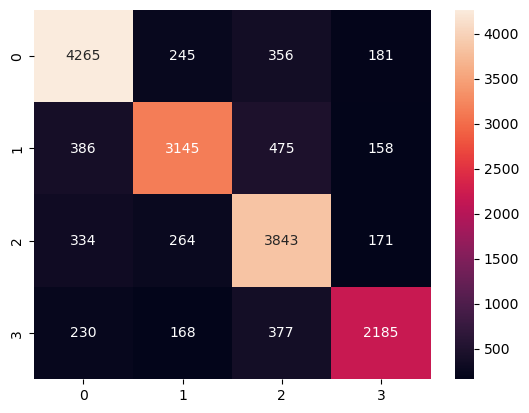

In [58]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g')

# Model have higher accuracy of 80% and cost of FP is higher
